Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

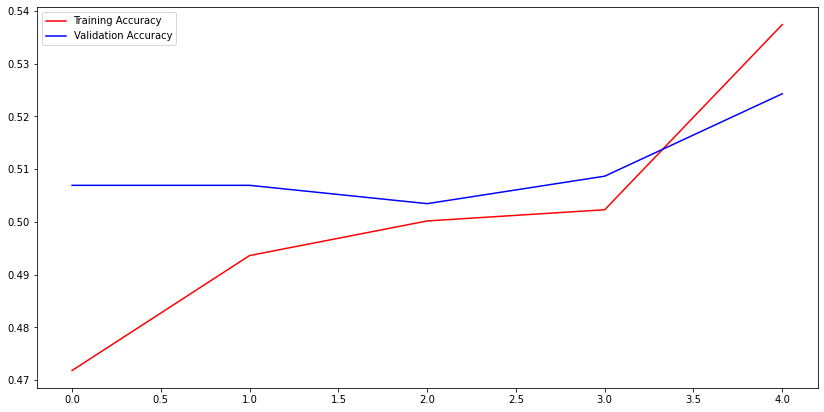

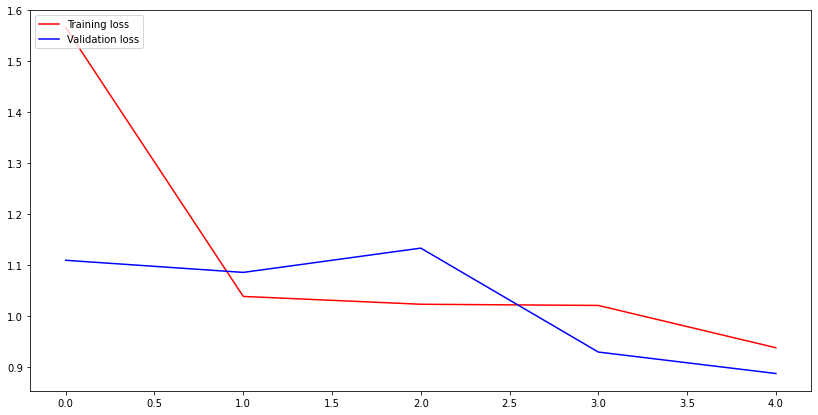

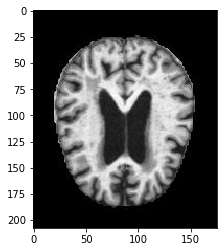

1/1 [==============================] - 0s 432ms/step
NonDemented


In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import os
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
X_train = []
Y_train = []
image_size = 150
labels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
for i in labels:
    folderPath = os.path.join('C:/Users/Yogesh Tewari/Alzheimer_s Dataset/train',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('C:/Users/Yogesh Tewari/Alzheimer_s Dataset/test',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=5,validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()
img = cv2.imread('C:/Users/Yogesh Tewari/Alzheimer_s Dataset/test/MildDemented/27 (20).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('C:/Users/Yogesh Tewari/Alzheimer_s Dataset/test/MildDemented/27 (20).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
if(indices==0):
    print("MildDemented")
elif(indices==1):
    print("ModerateDemented")
elif(indices==2):
    print("NonDemented")
elif(indices==3):
    print("VeryMildDemented")

In [2]:
img = cv2.imread('C:/Users/Yogesh Tewari/Pictures/40708_2018_80_Fig1_HTML.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [3]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

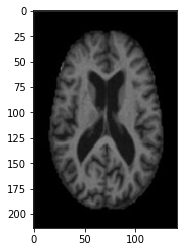

In [6]:
from tensorflow.keras.preprocessing import image
img = image.load_img('C:/Users/Yogesh Tewari/Pictures/40708_2018_80_Fig1_HTML.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [7]:
a=model.predict(img_array)
indices = a.argmax()
if(indices==0):
    print("MildDemented")
elif(indices==1):
    print("ModerateDemented")
elif(indices==2):
    print("NonDemented")
elif(indices==3):
    print("VeryMildDemented")

1/1 [==============================] - 0s 79ms/step
NonDemented
